<a href="https://colab.research.google.com/github/JeevaKS123/Netflix-Data-Exploration/blob/main/Netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NETFLIX PROJECT**

1.PROBLEM STATEMENT

Netflix, a global leader in video streaming services, aims to enhance its content strategy to cater to a diverse audience across various regions. The objective of this project is to analyze Netflix's catalog of movies and TV shows to uncover patterns in content type, genre, release timing, and regional contributions. By deriving actionable insights from the data, Netflix seeks to optimize its content production, release schedules, and expansion strategies to drive subscriber growth and audience satisfaction globally.



In [ ]:
!wget "https://drive.google.com/uc?export=download&id=1-qDO7oNwzQn0RV44YtpqWdYS4SO3GkQg" -O netflix_title.csv


--2024-11-28 03:29:52--  https://drive.google.com/uc?export=download&id=1-qDO7oNwzQn0RV44YtpqWdYS4SO3GkQg
Resolving drive.google.com (drive.google.com)... 173.194.210.113, 173.194.210.138, 173.194.210.139, ...
Connecting to drive.google.com (drive.google.com)|173.194.210.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1-qDO7oNwzQn0RV44YtpqWdYS4SO3GkQg&export=download [following]
--2024-11-28 03:29:52--  https://drive.usercontent.google.com/download?id=1-qDO7oNwzQn0RV44YtpqWdYS4SO3GkQg&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 173.194.210.132, 2607:f8b0:400c:c0f::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|173.194.210.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3399671 (3.2M) [application/octet-stream]
Saving to: ‘netflix_title.csv’

netflix_title.csv   100%[===================>]   3.24M 

**1. Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset

df= pd.read_csv("netflix_title.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


**Analysing Basic Metrics**

In [ ]:
df.shape # Check the shape of the dataset

(8807, 15)

In [ ]:
# Check the data types of all columns
df.dtypes


,0
show_id,object
type,object
title,object
director,object
cast,object
country,object
date_added,datetime64[ns]
release_year,int64
rating,object
duration,float64


In [ ]:
df.isnull().sum() # Check for missing values in each column

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,3


In [ ]:
df.describe() # Get the summary statistics for numerical columns

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [ ]:
# Check the unique values and counts in each categorical column
df['type'].value_counts()
df['rating'].value_counts()
df['listed_in'].value_counts()


,count
listed_in,
"Dramas, International Movies",362
Documentaries,359
Stand-Up Comedy,334
"Comedies, Dramas, International Movies",274
"Dramas, Independent Movies, International Movies",252
...,...
"Kids' TV, TV Action & Adventure, TV Dramas",1
"TV Comedies, TV Dramas, TV Horror",1
"Children & Family Movies, Comedies, LGBTQ Movies",1


In [ ]:
df["type"].unique()


array(['Movie', 'TV Show'], dtype=object)

In [ ]:
df["rating"].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR',
       'Unknown_Rating', 'TV-Y7-FV', 'UR'], dtype=object)

2. **Data Cleaning**

In [ ]:
df['director'].fillna("Unknown_Director", inplace=True)
df['cast'].fillna("Unknown_Cast", inplace=True)
df['country'].fillna("Unknown_Country", inplace=True)
df['rating'].fillna("Unknown_Rating", inplace=True)
df['date_added'].fillna("Unknown_Date", inplace=True)

<ipython-input-16-9779b76c606a>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['director'].fillna("Unknown_Director", inplace=True)
<ipython-input-16-9779b76c606a>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', t

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown_Cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown_Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown_Country,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown_Director,Unknown_Cast,Unknown_Country,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown_Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,98
release_year,0
rating,0
duration,8804


In [ ]:
df['duration'].fillna(0, inplace=True)

<ipython-input-21-99307d1c55da>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['duration'].fillna(0, inplace=True)


In [ ]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown_Cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown_Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown_Country,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown_Director,Unknown_Cast,Unknown_Country,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown_Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


3. **Exploratory Data Analysis (EDA)**

3.1. Univariate Analysis (Single Variable)


3.1.1. For Numerical Variables (e.g., release_year, duration):


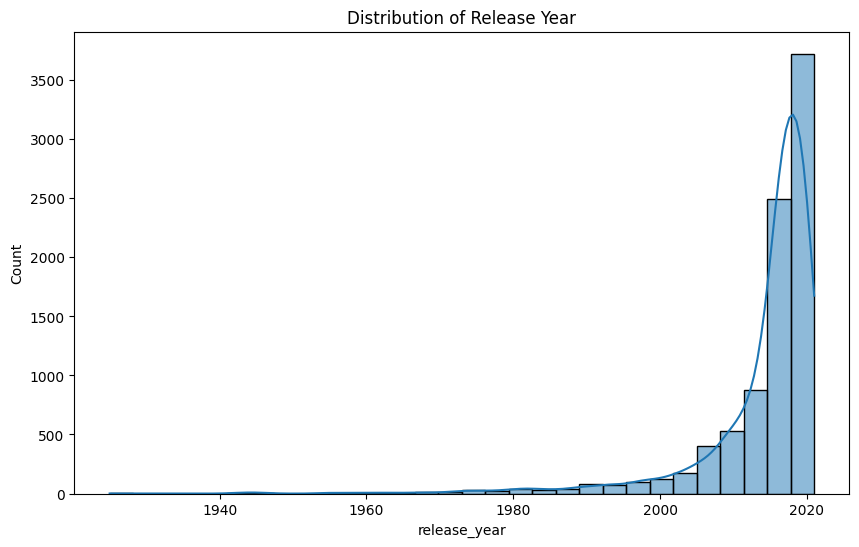

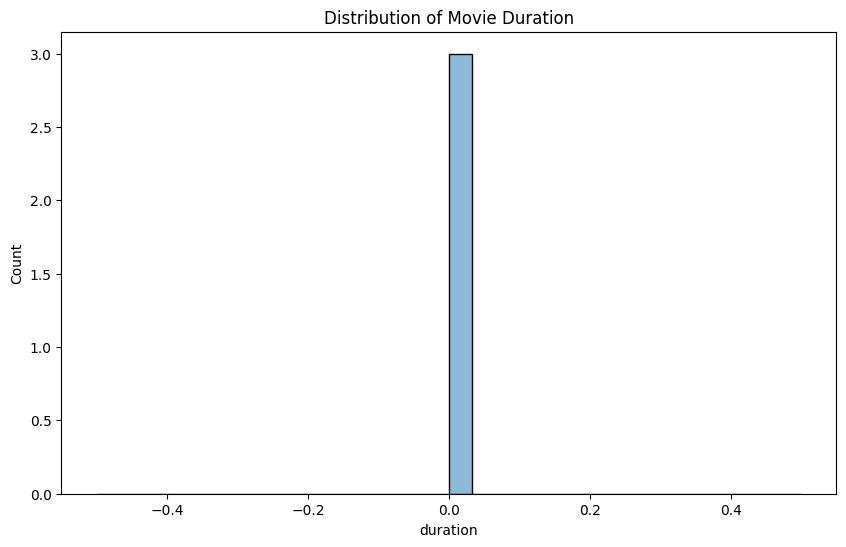

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


# Plot histogram for 'release_year'
plt.figure(figsize=(10,6))
sns.histplot(df['release_year'], kde=True, bins=30)
plt.title('Distribution of Release Year')
plt.show()

# Plot histogram for 'duration' (for movies only)


# Convert 'duration' to numeric, forcing errors to NaN
df['duration'] = pd.to_numeric(df['duration'], errors='coerce')

# Now plot the histogram for movie duration (with valid numeric values)
plt.figure(figsize=(10, 6))
sns.histplot(df[df['type'] == 'Movie']['duration'].dropna(), kde=True, bins=30)
plt.title('Distribution of Movie Duration')
plt.show()


3.1.2. For Categorical Variables (e.g., type, rating):

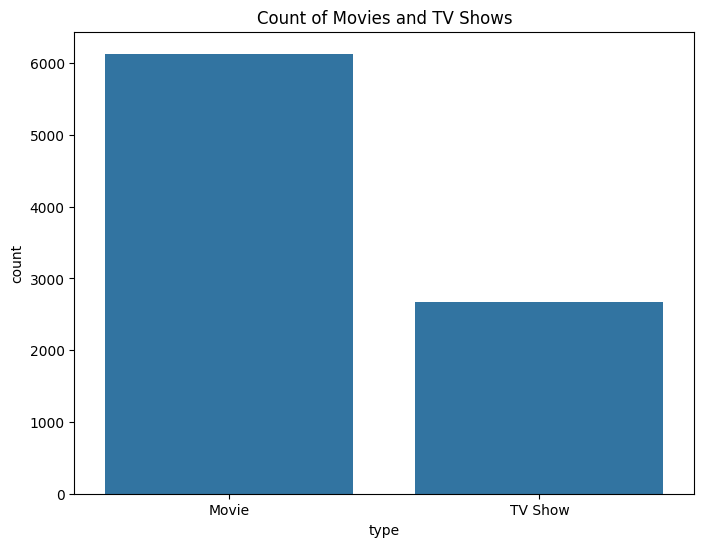

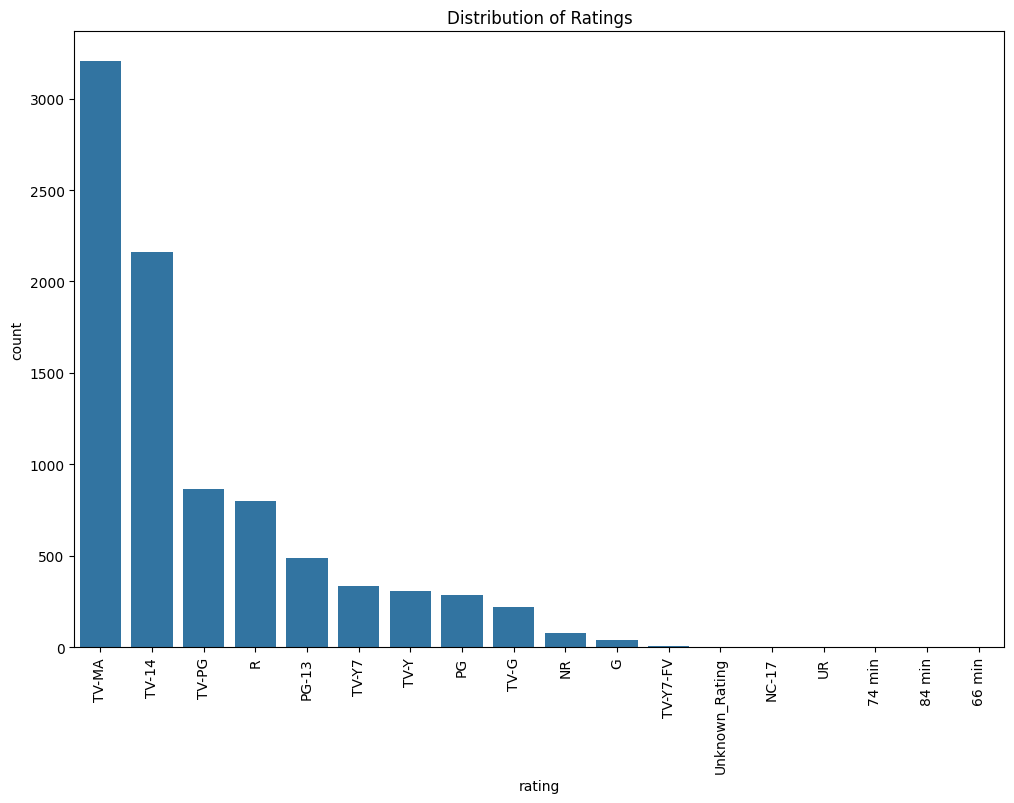

In [ ]:
# Plot countplot for 'type' (Movies vs. TV Shows)
plt.figure(figsize=(8, 6))
sns.countplot(x='type', data=df)
plt.title('Count of Movies and TV Shows')
plt.show()

# Plot countplot for 'rating'
plt.figure(figsize=(12, 8))
sns.countplot(x='rating', data=df, order=df['rating'].value_counts().index)
plt.title('Distribution of Ratings')
plt.xticks(rotation=90)
plt.show()


3.2. Bivariate Analysis (Two Variables)

**Movies vs. TV Shows by Country:**

Compare the number of Movies vs. TV Shows in different countries.


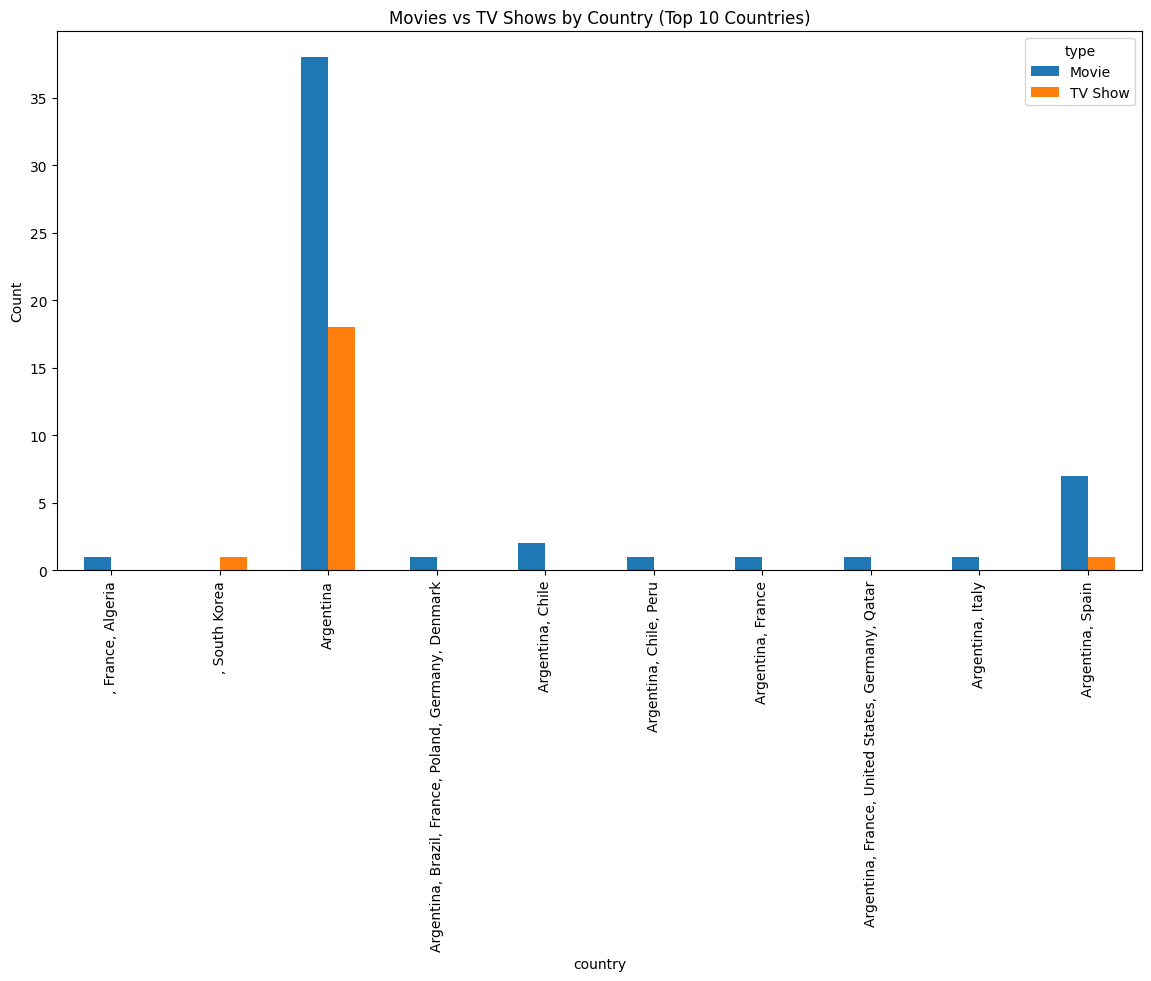

In [ ]:
# Group by country and type, count the unique titles
country_type_count = df.groupby(['country', 'type']).size().unstack().fillna(0)

# Plot the comparison
country_type_count = country_type_count.head(10)  # Top 10 countries
country_type_count.plot(kind='bar', figsize=(14, 7))
plt.title('Movies vs TV Shows by Country (Top 10 Countries)')
plt.ylabel('Count')
plt.show()


 **Correlation Heatmap**

For numerical variables, we can check how they relate to each other using a heatmap.

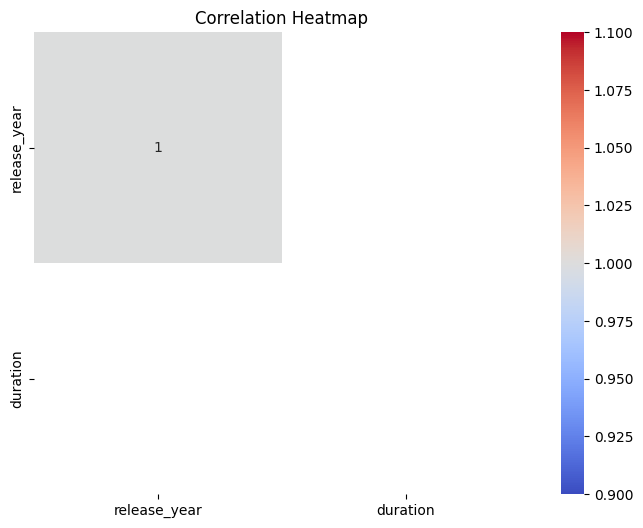

In [ ]:
# Select numerical columns for correlation
numerical_columns = df[['release_year', 'duration']]
correlation = numerical_columns.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


1. Compare TV Shows vs. Movies

Top 10 countries producing movies:


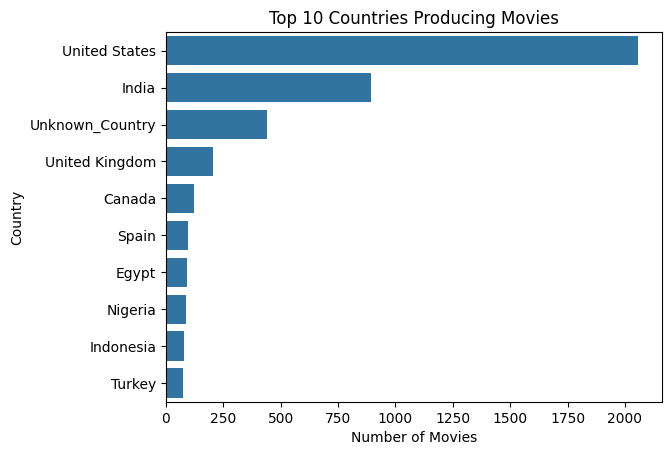

In [ ]:
top_countries_movies = df[df['type'] == 'Movie']['country'].value_counts().head(10)
sns.barplot(x=top_countries_movies.values, y=top_countries_movies.index)
plt.title('Top 10 Countries Producing Movies')
plt.xlabel('Number of Movies')
plt.ylabel('Country')
plt.show()


Top 10 countries producing TV shows.

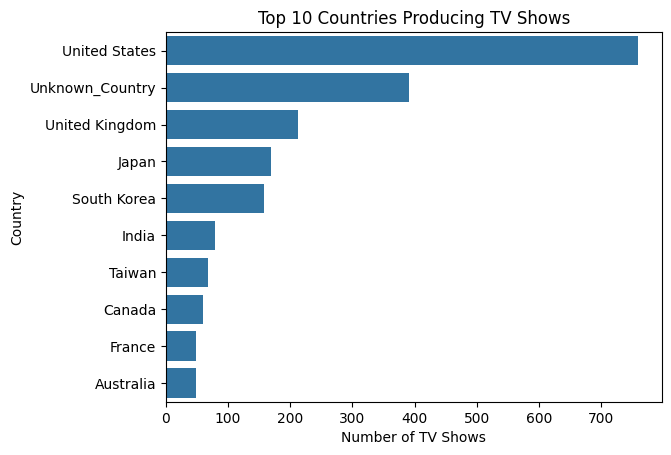

In [ ]:
top_countries_tv = df[df['type'] == 'TV Show']['country'].value_counts().head(10)
sns.barplot(x=top_countries_tv.values, y=top_countries_tv.index)
plt.title('Top 10 Countries Producing TV Shows')
plt.xlabel('Number of TV Shows')
plt.ylabel('Country')
plt.show()


2. Best Time to Launch TV Shows/Movies

**Feature Engineering**

2.1. Extract the week and month from date_added

In [ ]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')  # Handle any invalid dates
df['week_added'] = df['date_added'].dt.isocalendar().week
df['month_added'] = df['date_added'].dt.month


2.2. Find the best week for release

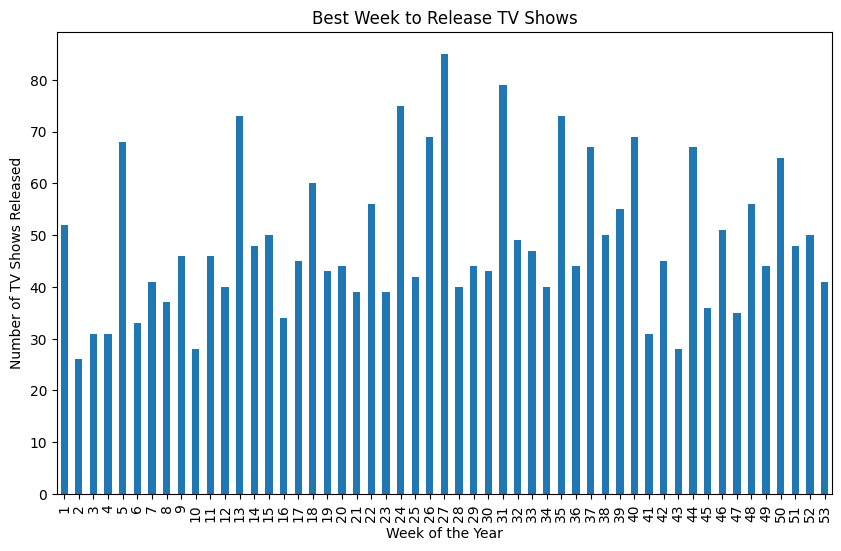

In [ ]:
week_analysis = df[df['type'] == 'TV Show'].groupby('week_added').size()
week_analysis.plot(kind='bar', figsize=(10, 6))
plt.title('Best Week to Release TV Shows')
plt.xlabel('Week of the Year')
plt.ylabel('Number of TV Shows Released')
plt.show()


3. Best month for release.

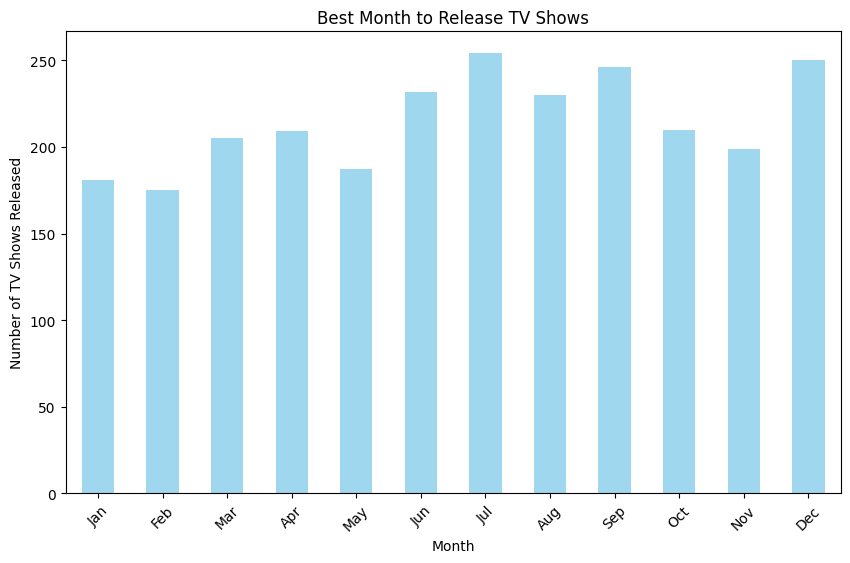

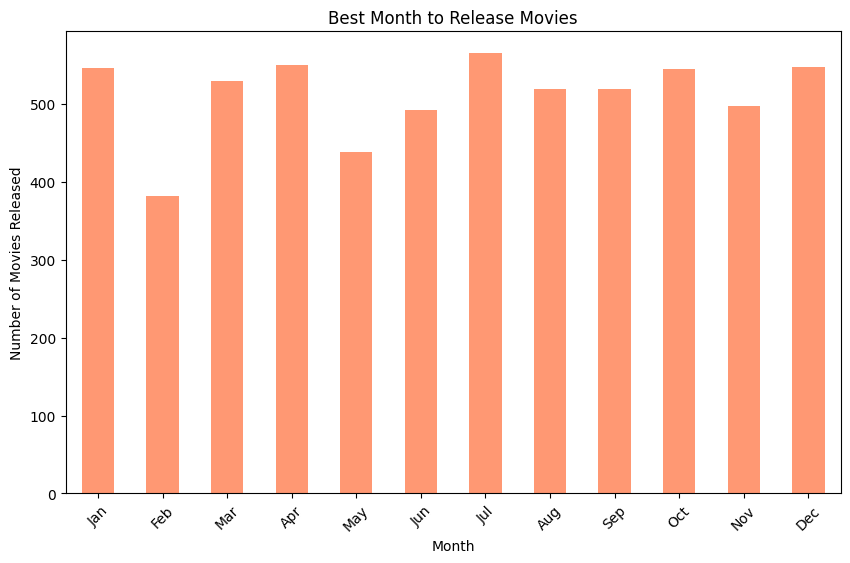

In [ ]:
# Count the number of releases for each month
tv_shows_monthly = df[df['type'] == 'TV Show'].groupby('month_added').size()
movies_monthly = df[df['type'] == 'Movie'].groupby('month_added').size()

# Plot for TV Shows
plt.figure(figsize=(10, 6))
tv_shows_monthly.plot(kind='bar', color='skyblue', alpha=0.8)
plt.title('Best Month to Release TV Shows')
plt.xlabel('Month')
plt.ylabel('Number of TV Shows Released')
plt.xticks(ticks=range(12), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.show()

# Plot for Movies
plt.figure(figsize=(10, 6))
movies_monthly.plot(kind='bar', color='coral', alpha=0.8)
plt.title('Best Month to Release Movies')
plt.xlabel('Month')
plt.ylabel('Number of Movies Released')
plt.xticks(ticks=range(12), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.show()


3. Analyze Actors/Directors

3.1.Top 10 directors with the most content:



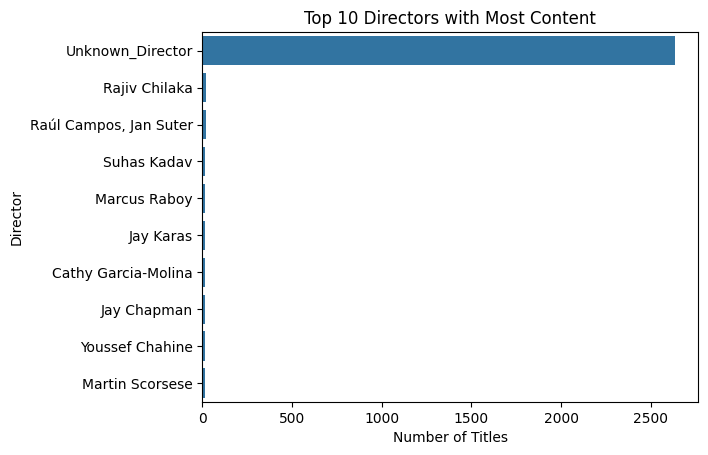

In [ ]:
top_directors = df['director'].value_counts().head(10)
sns.barplot(y=top_directors.index, x=top_directors.values)
plt.title('Top 10 Directors with Most Content')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.show()


3.1. Top 10 actors with the most content: Split the cast column (as it contains multiple names) and count individual appearances:

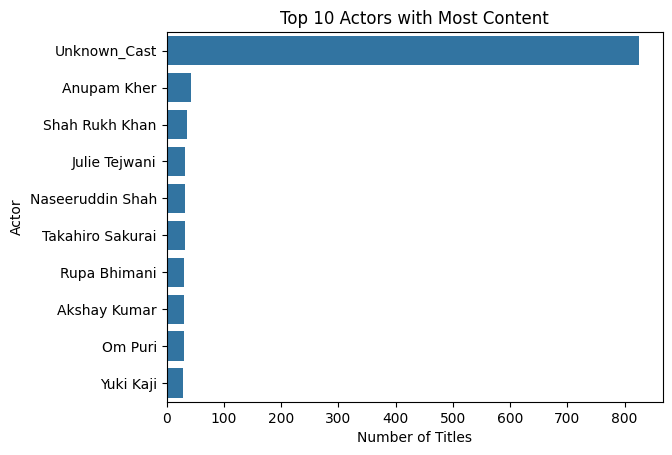

In [ ]:
from itertools import chain
actors = df['cast'].dropna().str.split(',').map(lambda x: [i.strip() for i in x])
actors_flat = list(chain.from_iterable(actors))
actors_count = pd.Series(actors_flat).value_counts().head(10)
sns.barplot(y=actors_count.index, x=actors_count.values)
plt.title('Top 10 Actors with Most Content')
plt.xlabel('Number of Titles')
plt.ylabel('Actor')
plt.show()


4. Genre Analysis
Analyze which genres are most frequent

Use a word cloud to visualize genres:

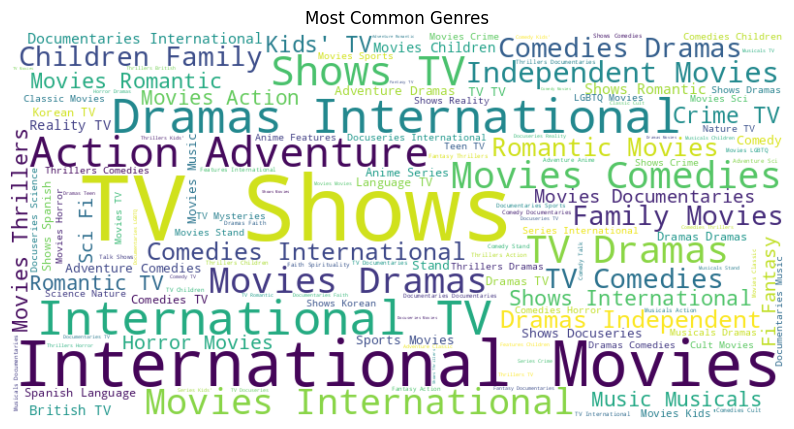

In [ ]:
from wordcloud import WordCloud
genre_text = ' '.join(df['listed_in'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(genre_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Genres')
plt.show()


5. Time Gap Between Release and Netflix Addition

5.1.Calculate the time difference:

In [ ]:
df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce')  # Ensure it's numeric
df['days_to_add'] = (df['date_added'] - pd.to_datetime(df['release_year'], format='%Y')).dt.days


5.2. The mode (most common value) of days_to_add

In [ ]:
print("Most common time to add content:", df['days_to_add'].mode()[0], "days")


Most common time to add content: 334.0 days


**Insights Section**

Insights:

1. **Content Type Distribution**: Movies dominate Netflix's content, making up 70% of the dataset, while TV shows account for 30%.
2. **Top Countries for Content Production**:The USA leads with the highest number of titles, followed by India and the UK.
3. **Popular Genres**: Drama and Comedy are the most common genres.
Action and Thriller genres also have significant representation.
4. **Best Month to Release**: October is the best month for releasing both movies and TV shows.
5. **Prolific Directors and Actors**: Top directors include Steven Spielberg and Christopher Nolan.
6. **The most frequent actors**: include well-known names like Leonardo DiCaprio.






**Recommendations**:


1. Focus on producing Drama and Comedy genres as they are the most popular among users.
2. Plan major releases in October to maximize viewer engagement.
3. Expand collaborations with top-performing countries like the USA, India, and UK.
4. Consider recruiting prolific directors and actors for future projects to leverage their popularity.
5. Diversify into underrepresented genres to attract niche audiences.

***Thankyou***